## Задание к лекции 25.04.2020

Для каждого датасета, лежащего в архиве (описание для данных находится в отдельном файле), вам необходимо:
1. обучить DecisionTreeClassifier из библиотеки sklearn таким образом, чтобы вас устраивала точность предсказаний;
2. В каждом из исследований у вас недостаточно денег, поэтому вам необходимо выбрать топ-5 признаков, которые лучше всего “помогают” в разбиении на классы.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV  
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc
import warnings
%matplotlib inline

In [2]:
def corr_plot(data,method='pearson'):
    corr = data.corr(method=method)
    mask = np.triu(np.ones_like(corr, dtype=np.bool))
    f, ax = plt.subplots(figsize=(11, 9))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
    plt.title('Correlation plot',fontsize=18)
    
def get_roc_auc(estimator, y_test, X_test):
    probs = estimator.predict_proba(X_test)
    preds = probs[:,1]
    fpr, tpr, threshold = roc_curve(y_test, preds)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8,5)) 
    plt.title('Receiver Operating Characteristic',fontsize=18)
    plt.plot(fpr, tpr, 'b', label = 'AUC = %f' % roc_auc,color='darkorange')
    plt.legend(loc = 'lower right',fontsize=14)
    plt.plot([0, 1], [0, 1],linestyle='--')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
def feature_imp_exctraction(clf,X):
    feat_imp_data = pd.DataFrame({'feauture':X.columns,\
                              'importance':pd.array(clf.feature_importances_)})
    feat_imp_data = feat_imp_data.sort_values('importance',ascending=False)
    feat_imp_data.importance = np.around(feat_imp_data.importance,decimals=4)
    feat_imp_data
    return feat_imp_data

In [3]:
data1 = pd.read_csv("ML_qHW_01/Data_and_description/Part_1.csv")
data1.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
all(data1.isnull().sum()==0) 

True

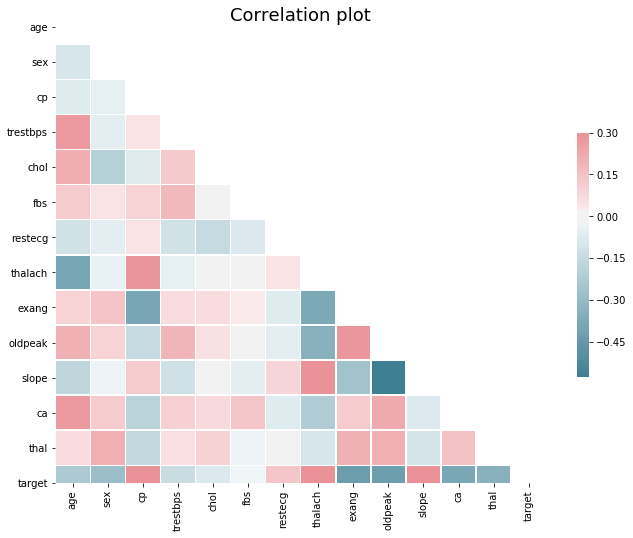

In [5]:
corr_plot(data1)

In [8]:
y = data1.target
X = data1.drop("target",axis=1,inplace=False)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True, random_state=42)

{'criterion': 'gini', 'max_depth': 3, 'splitter': 'best'} 

              precision    recall  f1-score   support

           0       0.72      0.79      0.75        42
           1       0.83      0.78      0.80        58

    accuracy                           0.78       100
   macro avg       0.78      0.78      0.78       100
weighted avg       0.78      0.78      0.78       100



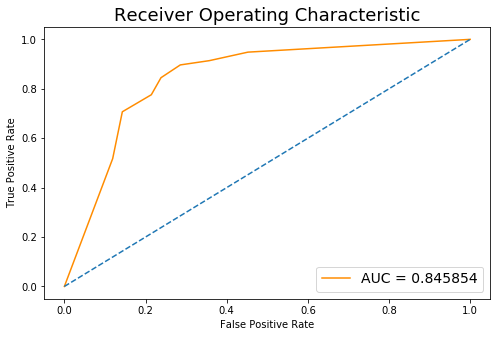

In [10]:
warnings.filterwarnings('ignore')

clf = DecisionTreeClassifier()
params = {'max_depth' : range(1,len(X.columns)),
          'criterion':['gini', 'entropy'],
          'splitter':['best', 'random']}

grid_search_d3 = GridSearchCV(clf,params,cv=5)
grid_search_d3.fit(X_train,y_train)

print(grid_search_d3.best_params_,'\n')

best_tree = grid_search_d3.best_estimator_
best_tree.score(X_test,y_test)
y_pred = best_tree.predict(X_test)

print(metrics.classification_report(y_test, y_pred))
get_roc_auc(best_tree, y_test, X_test)

In [12]:
feature_imp_exctraction(best_tree,X).iloc[0:5]

,feauture,importance
11,ca,0.4377
12,thal,0.2095
2,cp,0.1359
8,exang,0.0762
10,slope,0.0720


In [13]:
!head ML_qHW_01/Data_and_description/Part_1_description.txt

The Dataset contains

-> age - age in years 
-> sex - (1 = male; 0 = female) 
-> cp - chest pain type 
-> trestbps - resting blood pressure (in mm Hg on admission to the hospital) 
-> chol - serum cholestoral in mg/dl 
-> fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
-> restecg - resting electrocardiographic results 
-> thalach - maximum heart rate achieved 


# Датасет 2


In [14]:
data2 = pd.read_csv("ML_qHW_01/Data_and_description/Part_2.csv")
data2.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


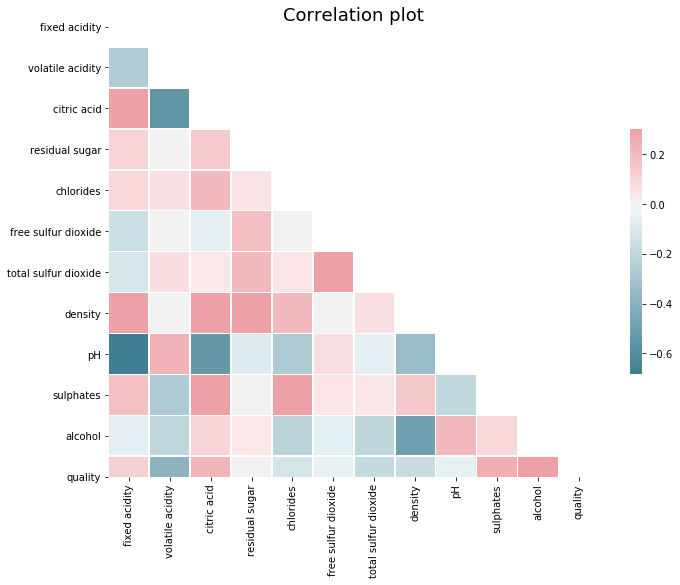

In [15]:
corr_plot(data2)

In [16]:
all(data2.isnull().sum()==0) 

True

In [17]:
X2 = data2.drop("quality",axis=1)
y2 = data2.quality
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.33, shuffle=True, random_state=42)

In [20]:
warnings.filterwarnings('ignore')

clf = DecisionTreeClassifier()
params = {'max_depth' : range(1,len(X2.columns)),
          'criterion':['gini', 'entropy'],
          'splitter':['best', 'random']}

grid_search_d3 = GridSearchCV(clf,params,cv=5)
grid_search_d3.fit(X_train2,y_train2)

print(grid_search_d3.best_params_,'\n')

best_tree2 = grid_search_d3.best_estimator_
best_tree2.score(X_test2,y_test2)
y_pred2 = best_tree2.predict(X_test2)

print(metrics.classification_report(y_test2, y_pred2))

{'criterion': 'gini', 'max_depth': 5, 'splitter': 'best'} 

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        19
           5       0.58      0.79      0.67       217
           6       0.51      0.46      0.49       213
           7       0.50      0.27      0.35        70
           8       0.00      0.00      0.00         7

    accuracy                           0.55       528
   macro avg       0.27      0.25      0.25       528
weighted avg       0.51      0.55      0.52       528



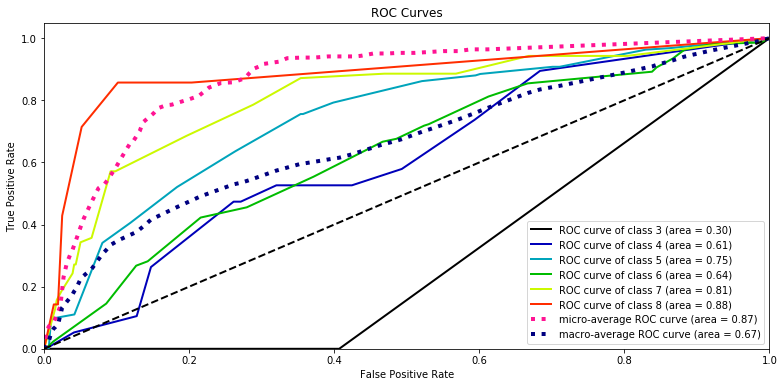

In [21]:
import scikitplot as skplt
import matplotlib.pyplot as plt

y_true = y_test2
y_probas = best_tree2.predict_proba(X_test2)
skplt.metrics.plot_roc_curve(y_true, y_probas,figsize=[13,6])
plt.show()

In [23]:
feature_imp_exctraction(best_tree2,X2).iloc[0:5]

,feauture,importance
10,alcohol,0.3940
9,sulphates,0.1916
1,volatile acidity,0.1186
6,total sulfur dioxide,0.1167
8,pH,0.0700


In [38]:
!head ML_qHW_01/Data_and_description/Part_2_description.txt

The Dataset contains

->  fixed acidity -- most acids involved with wine or fixed or nonvolatile (do not evaporate readily)
->  volatile acidity -- the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste
->  citric acid -- found in small quantities, citric acid can add 'freshness' and flavor to wines
->  residual sugar -- the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet
->  chlorides -- the amount of salt in the wine
->  free sulfur dioxide -- the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine
->  total sulfur dioxide -- amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine
-

# Датасет 3

In [25]:
data3 = pd.read_csv("ML_qHW_01/Data_and_description/Part_3.csv")
data3.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [26]:
all(data3.drop("Unnamed: 32",axis=1).isnull().sum()==0) 

True

In [27]:
data3.drop(["Unnamed: 32","id"],axis=1,inplace=True)

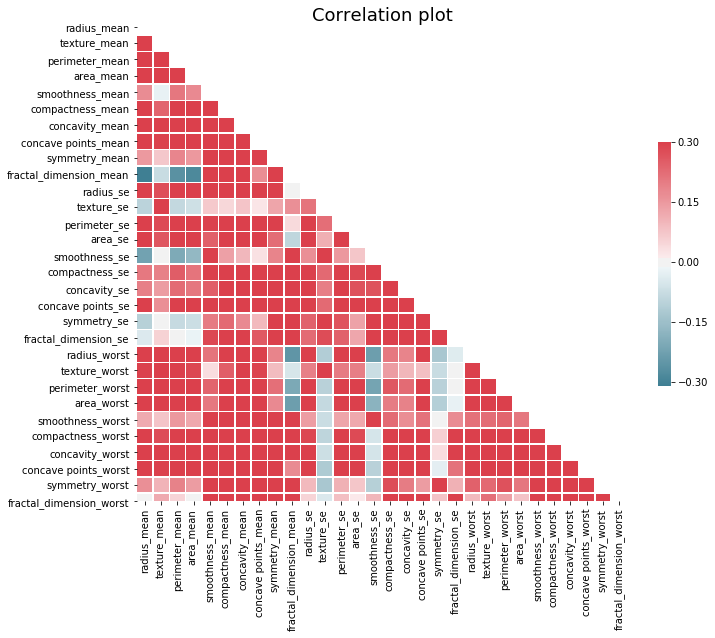

In [28]:
corr_plot(data3)

In [54]:
y3 = data3.loc[:,'diagnosis'].replace("M",1).replace("B",0)
X3 = data3.drop("diagnosis",axis=1,inplace=False)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.33, shuffle=True, random_state=42)

{'criterion': 'gini', 'max_depth': 2, 'splitter': 'random'} 

              precision    recall  f1-score   support

           0       0.99      0.92      0.95       121
           1       0.87      0.99      0.92        67

    accuracy                           0.94       188
   macro avg       0.93      0.95      0.94       188
weighted avg       0.95      0.94      0.94       188



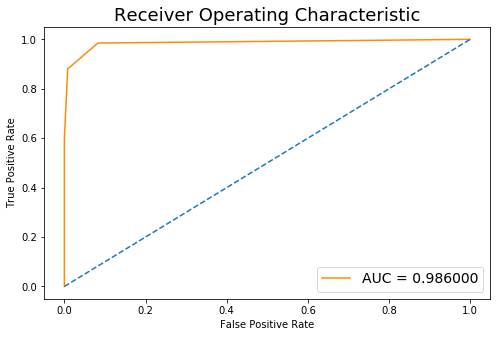

In [56]:
warnings.filterwarnings('ignore')

clf = DecisionTreeClassifier()
params = {'max_depth' : range(1,5),
          'criterion':['gini', 'entropy'],
          'splitter':['best', 'random']}

grid_search_d3 = GridSearchCV(clf,params,cv=5)
grid_search_d3.fit(X_train3,y_train3)

print(grid_search_d3.best_params_,'\n')

best_tree3 = grid_search_d3.best_estimator_
best_tree3.score(X_test3,y_test3)
y_pred3 = best_tree3.predict(X_test3)

print(metrics.classification_report(y_test3, y_pred3))
get_roc_auc(best_tree3, y_test3, X_test3)

In [57]:
feature_imp_exctraction(best_tree3,X3).iloc[0:5,:]

,feauture,importance
20,radius_worst,0.8153
27,concave points_worst,0.1728
10,radius_se,0.0119
0,radius_mean,0.0000
16,concavity_se,0.0000


In [58]:
!head ML_qHW_01/Data_and_description/Part_3_description.txt

1) ID number
2) Outcome (R = recur, N = nonrecur)
3) Time (recurrence time if field 2 = R, disease-free time if
field 2 = N)
4-33) Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)
b) texture (standard deviation of gray-scale values)
c) perimeter
d) area


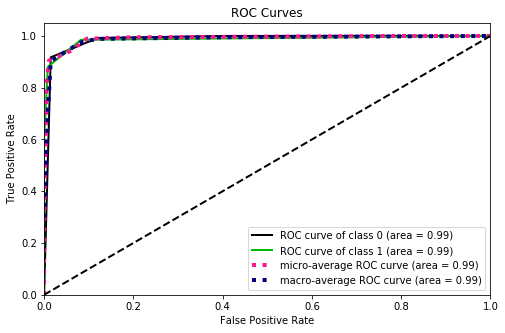

In [59]:
y_true = y_test3
y_probas = best_tree3.predict_proba(X_test3)
skplt.metrics.plot_roc_curve(y_true, y_probas,figsize=[8,5])
plt.show()